<a href="https://colab.research.google.com/github/GaetanRsl/PIR_Projetc/blob/master/CNN%2BRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
clf = tree.DecisionTreeClassifier()

val_list = list(OrgansNames.values())

start = 0
end= start+999
# sets the test size
size=0.5  
# sets the random state
rstate=200
classif =0

X_actu = []
Y_actu = []

print("============================ WARNING ============================\nTest de classification sur les classes séparées\n================================================================\nClassification is starting, test size is 0.5")
for b in range(23):
    X_actu = []
    Y_actu = []
    X_actu= X[:][start:end]
    Y_actu= Y[:][start:end]
    X_train, X_test, y_train, y_test = train_test_split(X_actu, Y_actu, test_size=size, random_state=rstate)
    #clf = clf.fit(X_train, y_train)
    #sc = clf.score(X_test, y_test)

    print( "----> RESULTS after classification for "+ str(val_list[b])+ " is : "+ str(sc*100) +"%" )
    
    classif = classif+1
    start= start + 999
    end= start+999
print(val_list)
#print(Y)

In [ ]:
import torch.nn as nn


class Net(nn.Module):  # [batch_size, input_channel, height, width]
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=10) #100 # in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros'
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5) #1000
        self.avgpool = nn.AvgPool2d(2, 2)  # kernel_size, stride
        # self.conv2 = nn.Conv2d(8, 16, 5)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(4*4*20, 160)
        self.fc2 = nn.Linear(160, 80)
        self.fc3 = nn.Linear(80, 40)
        #self.fc4 = nn.Linear(40, 23)
        # self.fc5 = nn.Linear(100, 50)
        # self.fc6 = nn.Linear(50, 23)

    def forward(self, x):  #net(input) ->
        # Entrée : 33 * 33 * 1
        #print("1",x.shape)
        x = self.avgpool(self.relu(self.conv1(x)))
        #print("2", x.shape)
        x = self.avgpool(self.relu(self.conv2(x)))
       # print("before : ",x.shape)
        x = x.view(-1, 4*4*20)
        #print("after : ",x.shape)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        #print("AFTER FC3 : ", x.shape)
        return x

In [ ]:
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import os

class OrgansDataset(Dataset):

    def __init__(self, filestoload, root_dir, nrows=None):
        self.samples = []
        self.csv_files = []
        self.filestoload = filestoload
        self.dict = {
            0: 0, #"background"
            1: 1, #"body envelope",
            2: 2, #"thorax-abdomen",
            86: 3, #"spleen (rate)",
            58: 4, #"liver (foie)",
            480: 5, #"aorta (aorte)",
            7578: 6, #"thyroid gland",
            1247: 7, #"trachea",
            1302: 8, #"right lung",
            1326: 9, #"left lung",
            170: 10, #"pancreas",
            187: 11, #"gallbladder (vésicule biliaire)",
            237: 12, #"urinary bladder (vessie)",
            2473: 13, #"sternum",
            29193: 14, #"first lumbar vertebra",
            29662: 15, #"right kidney",
            29663: 16, #"left kidney",
            30324: 17, #"right adrenal gland",
            30325: 18, #"left adrenal gland",
            32248: 19, #"right psoas major",
            32249: 20, #"left psoas major",
            40357: 21, #"muscle body of right rectus abdominis",
            40358: 22, #"muscle body of left rectus abdominis",
        }
        self.nrows = nrows
        self.root_dir = root_dir
        self.targets = ""
        a = 0
        #self.X=[]
        #self.y=[]

        transform = transforms.Compose([
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.5], std=[0.5]),
        ])

        if (isinstance(root_dir, list)):
            for folder in root_dir:
                for file in os.listdir(folder):
                    if file.endswith(".csv") and a < filestoload:
                        print(file+" détecté")
                        print(folder)
                        self.csv_files.append(folder+file)
                        a += 1
        else:
            for file in os.listdir(root_dir):
                if file.endswith(".csv") and a < filestoload:
                    print(file+" détecté")
                    self.csv_files.append(root_dir+file)
                    a += 1

        for file in self.csv_files:
            self.organs_blocks = pd.read_csv(file, nrows=self.nrows)
            for row in self.organs_blocks.itertuples(index=False):
                self.samples.append([self.dict[row[0]], transform(np.reshape(np.array(list(row[1:1090]), dtype="uint8"), (33, 33)))])
                #self.y.append(Organsdict[row[0]])
                #self.X.append(list(row[1:1090]))
            print("Fichier | " + file + " | chargé")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        img = self.samples[idx][1]
        img = np.reshape(img, (1, 33, 33))
        return img, self.samples[idx][0]


In [ ]:
Organsdict = {
    0: 0,  # "background"
    1: 1,  # "body envelope",
    2: 2,  # "thorax-abdomen",
    86: 3,  # "spleen (rate)",
    58: 4,  # "liver (foie)",
    480: 5,  # "aorta (aorte)",
    7578: 6,  # "thyroid gland",
    1247: 7,  # "trachea",
    1302: 8,  # "right lung",
    1326: 9,  # "left lung",
    170: 10,  # "pancreas",
    187: 11,  # "gallbladder (vésicule biliaire)",
    237: 12,  # "urinary bladder (vessie)",
    2473: 13,  # "sternum",
    29193: 14,  # "first lumbar vertebra",
    29662: 15,  # "right kidney",
    29663: 16,  # "left kidney",
    30324: 17,  # "right adrenal gland",
    30325: 18,  # "left adrenal gland",
    32248: 19,  # "right psoas major",
    32249: 20,  # "left psoas major",
    40357: 21,  # "muscle body of right rectus abdominis",
    40358: 22,  # "muscle body of left rectus abdominis",
}
inverted_dict = dict(map(reversed, Organsdict.items()))
OrgansNames = {
    0: "background",
    1: "body envelope",
    2: "thorax-abdomen",
    86: "spleen (rate)",
    58: "liver (foie)",
    480: "aorta (aorte)",
    7578: "thyroid gland",
    1247: "trachea",
    1302: "right lung",
    1326: "left lung",
    170: "pancreas",
    187: "gallbladder (vésicule biliaire)",
    237: "urinary bladder (vessie)",
    2473: "sternum",
    29193: "first lumbar vertebra",
    29662: "right kidney",
    29663: "left kidney",
    30324: "right adrenal gland",
    30325: "left adrenal gland",
    32248: "right psoas major",
    32249: "left psoas major",
    40357: "muscle body of right rectus abdominis",
    40358: "muscle body of left rectus abdominis",
}
classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15",
            "16", "17", "18", "19", "20", "21", "22")


/content
cuda
10000108_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold2/
10000109_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold2/
10000110_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold2/
10000111_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold2/
10000112_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold3/
10000113_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold3/
10000127_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold3/
10000128_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold3/
10000129_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold4/
10000130_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit/fold4/
10000131_1_CTce_ThAb.csv détecté
/content/drive/My Drive/CTce_ThAb

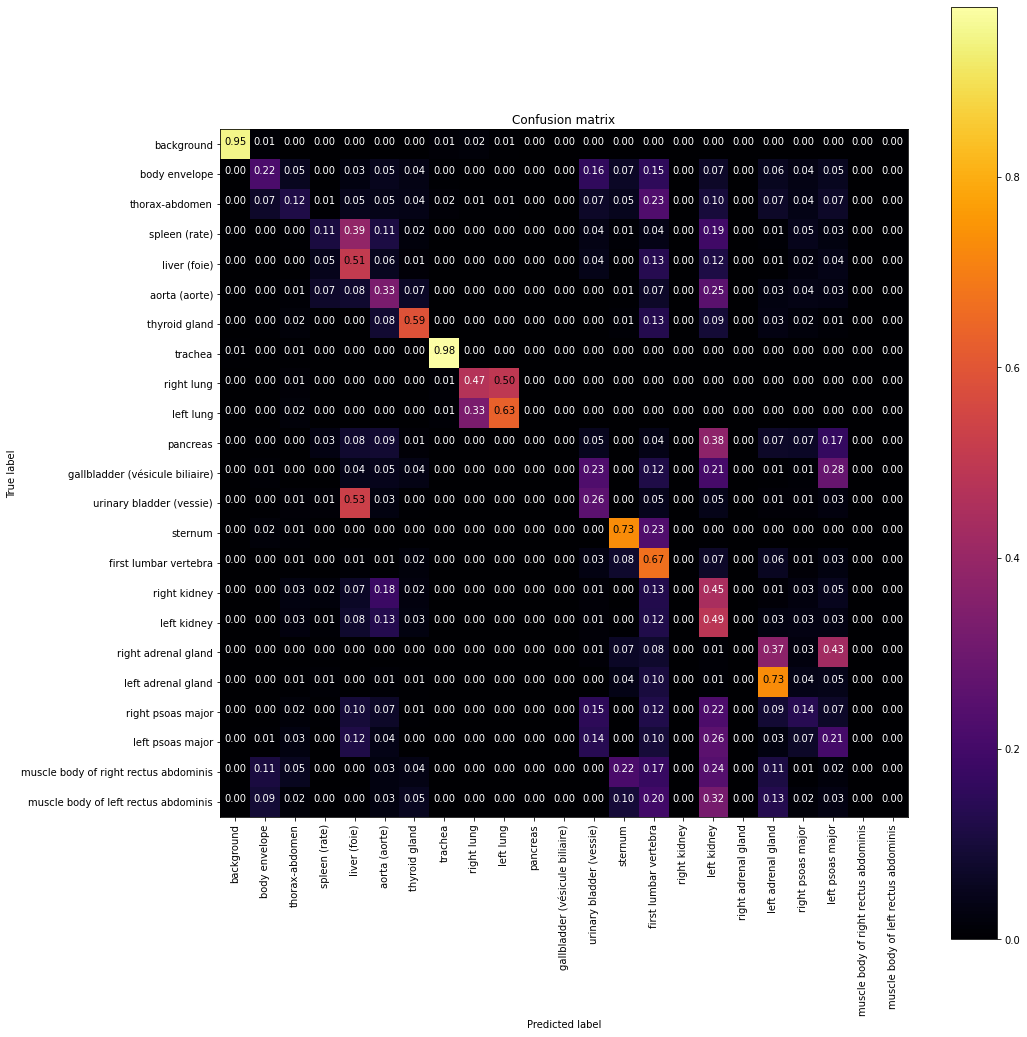

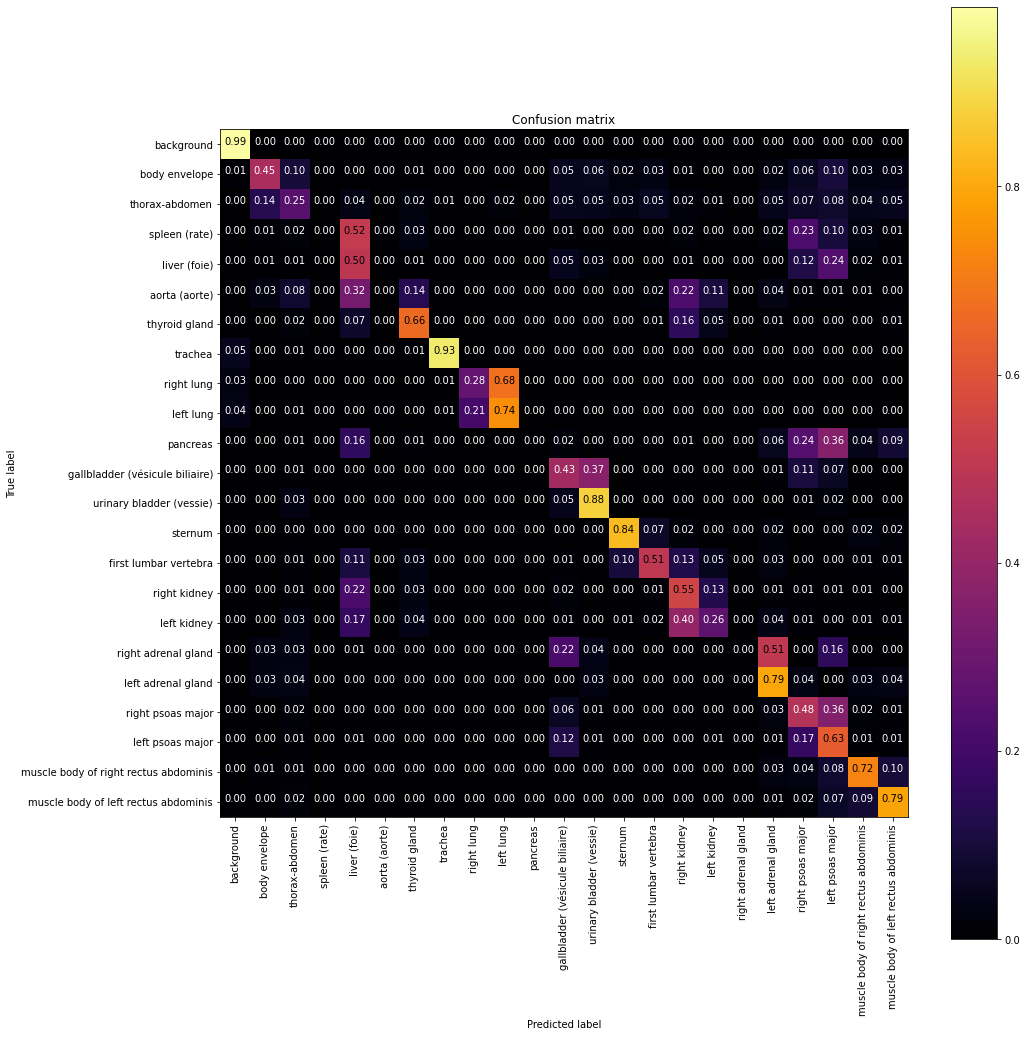

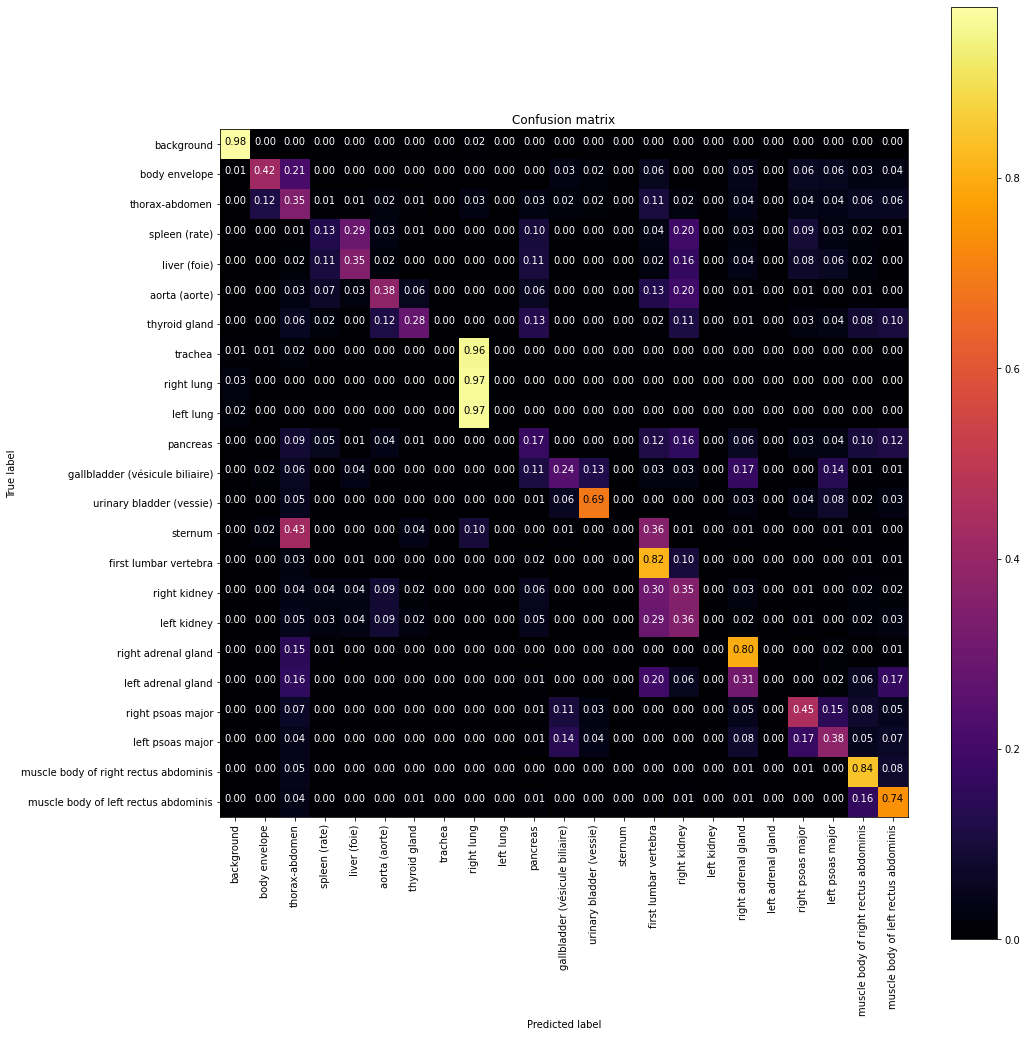

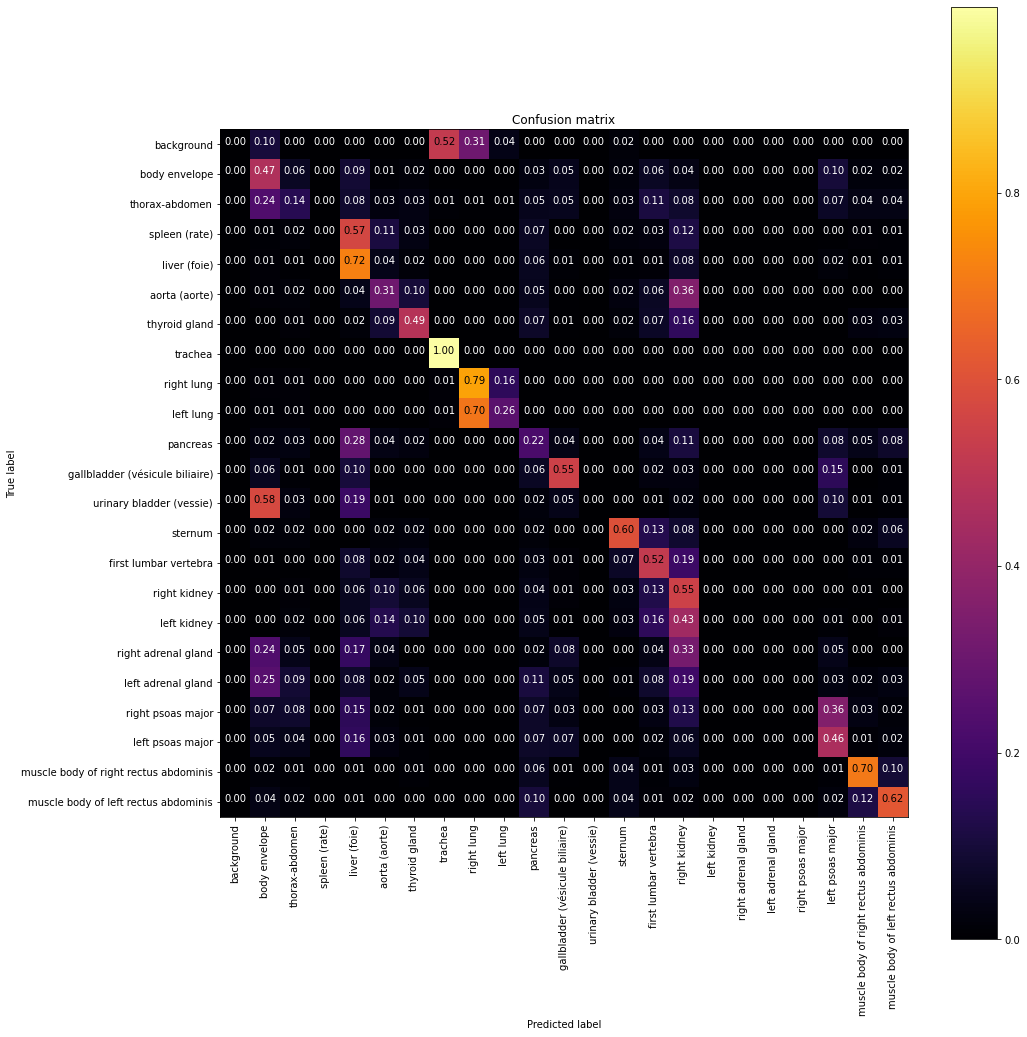

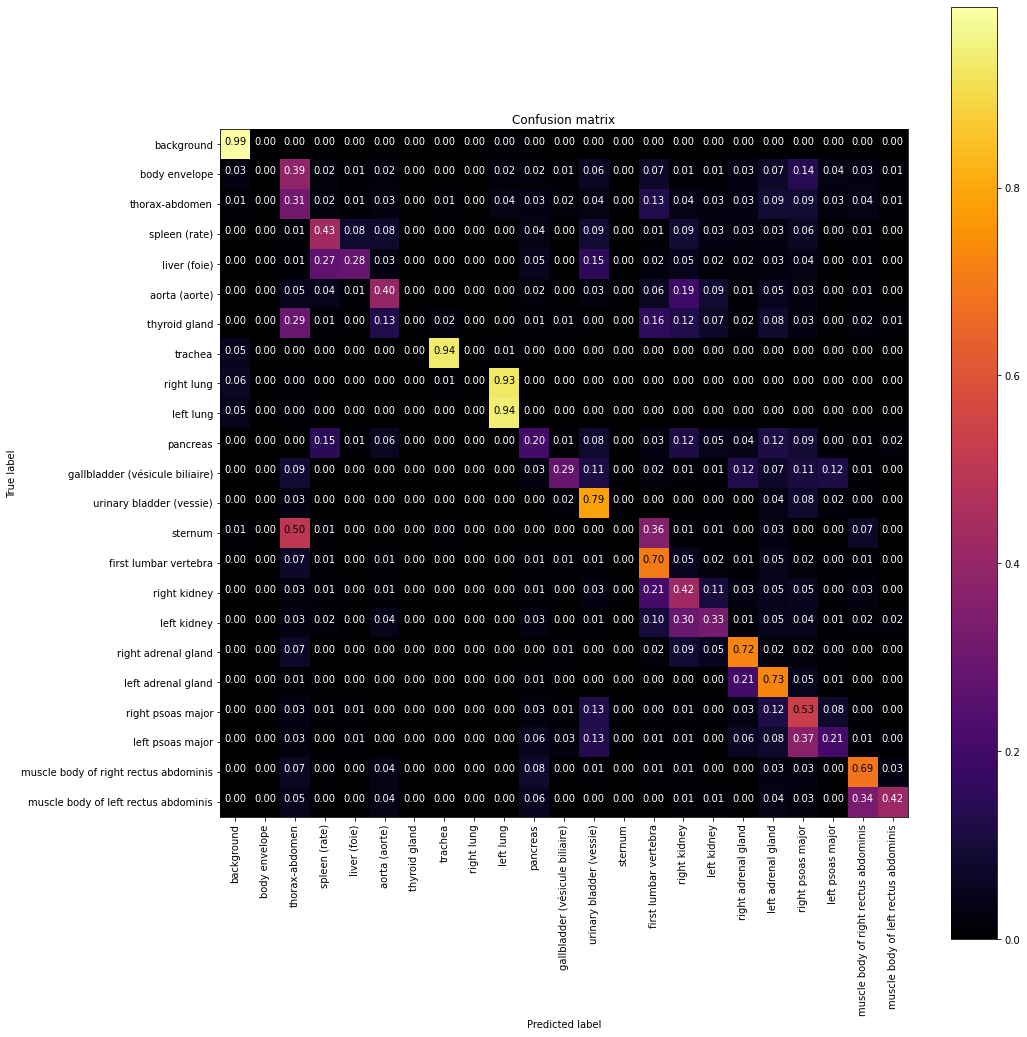

In [ ]:
import torch
import torch.utils.data as torchudata
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import numpy as np
import sys
import os
import re
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.inferno):
    if normalize:
        cm = cm.float() / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def get_all_preds(model, loader, device, listeA, listeB):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        preds = model(images.double())
        all_preds = torch.cat(
            (all_preds.to(device), preds.float())
            ,dim = 0
        ).to(device)
        preds = preds.cpu().detach().numpy()
        labels= labels.cpu().detach().numpy()
        listeA.append(preds)
        listeB.append(labels)
    return all_preds, listeA, listeB
    """
def get_features_in_list(model, loader, device, listeA, listeB):
    for batch2 in loader:
        images, labels = batch2
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images.double())
        outputs = outputs.cpu().detach().numpy()
        images= images.cpu().detach().numpy()
        listeA.append(outputs)
        listeB.append(images)
    return listeA, listeB
    """

def get_num_correct(preds, labels, device):
    return preds.argmax(dim=1).eq(labels).sum().item()


if __name__ == "__main__":
    nbpatients = 20
    patience = 100
    nrows = None

    path = os.path.realpath('')
    print(path)
    pthpath = path + "/drive/My Drive/"
    filelist = [f for f in os.listdir(pthpath) if f.endswith(".pth")]
    for f in filelist:
        os.remove(os.path.join(pthpath, f))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    

    datapath = path + "/drive/My Drive/"
    validpath = datapath + "valid/"
    testpath = datapath + "test/"
    # Initializing the sets (data, valid, test)
    #trainset = OrgansDataSet.OrgansDataset(filestoload, datapath, nrows=nrows)
    #trainloader = torchudata.DataLoader(trainset, batch_size=256, shuffle=True)

    #validset = OrgansDataSet.OrgansDataset(1, validpath, nrows=nrows)
    #validloader = torchudata.DataLoader(validset, batch_size=256, shuffle=True)

    #testset = OrgansDataSet.OrgansDataset(1, testpath, nrows=nrows)
    #testloader = torchudata.DataLoader(testset, batch_size=256, shuffle=True)

    folders = []

    running_loss = 0.0

    accuracy_valid = []

    accuracy_data = []

    avg_training_data = []

    nb_classes = 23
    n_epochs = 5
    
    for folder in os.listdir("/content/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit"):
        if folder.find("fold") != -1:
            folders.append(path + "/drive/My Drive/CTce_ThAb_b33x33_n1000_8bit" + "/" + folder + "/")
    filestoload = nbpatients - nbpatients/len(folders)
    X_inter=[]
    Y=[]
    for fold in range(len(folders)):
        net = Net().cuda().double()
        criterion = nn.CrossEntropyLoss()
        # optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, nesterov = True) # à tester
        optimizer = optim.AdamW(net.parameters(), lr=0.0005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=True)
        # scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, threshold=0.01, factor=0.8)
        folderscopy = folders.copy()
        testfolder = folderscopy.pop(fold)

        dataset_train = OrgansDataset(filestoload, folderscopy, nrows=nrows)
        train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

        dataset_test = OrgansDataset(filestoload, testfolder, nrows=nrows)
        test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=1, shuffle=False)

        all_preds = torch.tensor([])
        cmt = torch.zeros(nb_classes, nb_classes, dtype=torch.int32)
        targets = [s[0] for s in dataset_test.samples]
        targets = torch.FloatTensor(targets)

        for epoch in range(n_epochs):
            ###################
            # train the model #
            ###################
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                correct_data = 0.
                total_data = 0.
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)
                # print(labels)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = net(inputs.double())
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 400 == 0:
                    print('[%d, %5d] loss: %.9f' %
                          (epoch, i , running_loss / 400.))
                    running_loss = 0.0
 
        print('Saving Training')
        PATH = pthpath + "/model_computed-fold"+str(fold+1)+".pth"
        torch.save(net.state_dict(), PATH)
        net.load_state_dict(torch.load(PATH))

        all_preds = torch.tensor([])
        cmt = torch.zeros(nb_classes, nb_classes, dtype=torch.int32)
        targets = [s[0] for s in dataset_test.samples]
        targets = torch.FloatTensor(targets).to(device)
        print(test_loader)
        with torch.no_grad():
            test_preds, X_inter, Y = get_all_preds(net, test_loader, device, X_inter, Y)
        print("targets", targets)
        print("test_preds", test_preds.argmax())

        preds_correct = get_num_correct(test_preds, targets, device)
        print("total correct", preds_correct)
        print("accuracy:", preds_correct / len(dataset_test))
        stacked = torch.stack(
            (
                targets.float()
                ,test_preds.argmax(dim=1).float()
            )
            ,dim=1
        ).to(device)
        for p in stacked:
            tl, pl = p.tolist() #True Label, Predicted Label
            tl = int(tl)
            pl = int(pl)
            if pl<31:
                cmt[tl,pl] = cmt[tl,pl] + 1
        # cm = confusion_matrix(targets, test_preds.argmax(dim=1))
        fig = plt.figure(figsize=(15,15))
        fig.patch.set_facecolor('xkcd:white')
        names = []
        for k in OrgansNames:
            names.append(OrgansNames[k])
        names = tuple(names)
        print(names)
        plot_confusion_matrix(cmt, names, normalize = True)



In [ ]:
print(t1)

In [ ]:
X_inter=X_inter[:-1]
Y=Y[:-1]

X_inter=np.expand_dims(X_inter, axis=1)

In [ ]:
print(Y[0])
print(X_inter[0])

In [ ]:
X=[]
for v in range(len(X_inter)):
    X.append(X_inter[v][0][0])

In [ ]:
print(Y[0][0][0][0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
import pickle
from sklearn.metrics import classification_report

X_train=[]
y_train=[]
X_test=[]
X_test=[]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=200)
tree = RandomForestClassifier()
clf = tree.fit(X_train, y_train)
val_list = list(OrgansNames.values())
#score = clf.score(X_test, y_test)
#print("Accuracy globale : ", str(score*100), "%")

#5-fold cross validation

y_cross=cross_val_predict(clf, X, Y, cv=5)
cross_sc = cross_val_score(clf, X_test, y_test, cv=5)

print(" \n Global Classifying score is " + str(cross_sc*100)+"%")
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_sc.mean()*100, cross_sc.std()*100 * 2))

conf_mat = confusion_matrix(Y, y_cross)
pred=  clf.predict(X_test)
report = classification_report(Y, y_cross, target_names=val_list, output_dict=True)

df = pd.DataFrame(report).transpose()
df.to_csv('classificationReport.csv')
df.to_html('classificationReport.html')

cd= pd.DataFrame(cross_sc)
cd.to_csv('crossValidation.csv')

#val_list = list(OrgansNames.values())
lab =  np.unique(val_list)
cd= pd.DataFrame(conf_mat, index=lab, columns=lab)

cd.to_csv('confusionMatrix.csv')
cd.to_html("ConfusionMatrix.html")

#pkl_file="model.pkl"
#with open(pkl_file, "wb") as file:
    #pickle.dump(clf, file)

In [ ]:
import pickle

path_to_model = "/content/drive/My Drive/INSA/model.pkl"
pred=[]
with open(path_to_model, 'rb') as file:
    clf = pickle.load(file)
    pred=clf.predict(X_test)
report = classification_report(Y, y_cross, target_names=val_list, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificationReport3.csv')
df.to_html('classificationReport3.html')


In [ ]:
#report = classification_report(Y, y_cross, target_names=val_list, output_dict=True)

df = pd.DataFrame(report).transpose()
df.to_csv('classificationReport2.csv')
df.to_html('classificationReport2.html')

In [ ]:
import torch
import torch.utils.data as torchudata
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.transforms as plttransforms
import matplotlib.image as mpimg
import matplotlib.colors
from scipy import ndimage
import scipy
import math
import torchvision.transforms as transforms
import google.colab as colab
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import os
import types
from scipy.special import softmax
import pickle

In [ ]:
def count_parameters(model):
    total_param = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            num_param = np.prod(param.size())
            if param.dim() > 1:
                print(name, ':', 'x'.join(str(x) for x in list(param.size())), '=', num_param)
            else:
                print(name, ':', num_param)
            total_param += num_param
    return total_param

def rotateAndNormalise(image):
    image = ndimage.rotate(image, -90)
    # image = 255*(image - np.min(image))/np.ptp(image).astype(int) #Normalise dans [0, 255]
    image = (image - np.min(image))/np.ptp(image) #Normalise dans [0, 1]
    return image
       
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(int(windowSize[1]/2), image.shape[0] - int(windowSize[1]/2), stepSize):
		for x in range(int(windowSize[0]/2), image.shape[1] - int(windowSize[1]/2), stepSize):
			yield (x, y, image[y - int(windowSize[1]/2):y + int(windowSize[1]/2)+1, x - int(windowSize[0]/2):x + int(windowSize[0]/2)+1])
   
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    net = Net().cuda().double()
    filestoload = 1
    pthfile = "/content/drive/My Drive/model_computed-fold2.pth"
    filename = "/content/drive/My Drive/CTce_ThAb/10000108_1_CTce_ThAb.nii.gz"
    net.load_state_dict(torch.load(pthfile))

    size = (33,33)
    img = nib.load(filename)
    img_data = img.get_fdata()
    n_slices = img_data.shape[2]

    
    slice_step = 4
    n_slices = img_data.shape[2]//slice_step
    print("nombre de slices à analyser : {} ".format(n_slices))
    probabilities = np.zeros((img_data.shape[0], img_data.shape[1], n_slices, 40), dtype = "float16") #on crée une matrice de la même taille que le slice, avec à chaque pixel les 23 proba de détection
    print(probabilities.dtype)
    print("probabilities : ", probabilities.shape)
     #générateur qui renvoie (x,y,imagette) avec l'imagette centrée sur (x,y)
    #plt.imshow(slice0, cmap= "gray")

    batch = []

    for n in range(n_slices) : 
      a = 0
      slice0 = img_data[:,:,n*slice_step]
      slice0 = rotateAndNormalise(slice0) 
      imageGen = sliding_window(slice0, 1, size)
      coord=[]
      print("Slice n° {} sur {}".format(n+1, n_slices))
      with torch.no_grad():
          for image in imageGen:
              y, x = (image[0], image[1]) # indexation inverse à ce qui est donnée dans le yield ?
              inputs = image[2]
              inputs = np.reshape(image[2], (1,1,33,33))
              inputs = torch.tensor(inputs).to(device)

              output = net(inputs.double()).to(device)
              coord.append([x,y])
              probabilities[x][y][n] = output.cpu()
              
              if a%100000 == 0: 
                print("Iteration {}".format(a))
              a+=1
      #if n==1:        
      break

cuda
nombre de slices à analyser : 117 
float16
probabilities :  (512, 512, 117, 40)
Slice n° 1 sur 117
Iteration 0
Iteration 100000
Iteration 200000


In [ ]:
import pickle

path_to_model = "/content/drive/My Drive/INSA/model.pkl"

with open(path_to_model, 'rb') as file:
      clf = pickle.load(file)
      pred= clf.predict_proba(output.cpu().detach().numpy()) #proba de tel ou tel organe
print(pred)

[[0.21 0.04 0.   0.   0.   0.   0.01 0.19 0.21 0.34 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [ ]:
print(coord)

In [ ]:


def get_statistic_coordinates(slice0, coord):
    #slice0 = rotateAndNormalise(slice0)
    probabilities = np.zeros((slice0.shape[0], slice0.shape[1], 23))
    probStat =  np.zeros((probabilities.shape[0], probabilities.shape[1]))
    #fig=plt.figure(figsize=(8, 8))
    #plt.imshow(slice0, cmap= "gray")


    #fill in the stats for each class for trained model


    #turn the img into proper values
    #size = (33,33)
    #imageGen = sliding_window(slice0, 1, (33,33))
    #source=[]
    #coord = []
    '''
    #predictions=[]
    for image in imageGen:
      y,x = (image[0], image[1])
      datas = np.asarray(image[2])
      datas = datas.flatten()
      source.append(datas)
      coord.append([x,y])
    '''
    pred= []
    #predict - opens model and computes
    with open(path_to_model, 'rb') as file:
        clf = pickle.load(file)
        pred= clf.predict_proba(slice0)

    print("PRED", pred)

    # associate probabilities with prediction
    for n in range(len(pred)):
        x= coord[n][0]
        y= coord[n][1]
        probabilities[x][y]= pred[0][n]


    probabilities=np.asarray(probabilities)

    val_size = 512

    #associates coordinates with highest probability
    for x in range( val_size):
            for y in range( val_size):
                probStat[x][y] = np.argmax(probabilities[x][y])

    #fig, ax = plt.subplots(figsize=(8,8))
    #plt.imshow(probStat, cmap = "gray")
    #plt.colorbar()
    #plt.show()
   
    max_proba = np.max(probabilities, axis = 0)
    max_proba = np.max(max_proba, axis = 0)
    positions = np.zeros((23,3))



    isGreaterThanBeta = []
    for i in range(23) :
      if max_proba[i]>0.45:
        isGreaterThanBeta.append(i)
   
    
    for i in range(23): 
      if i not in isGreaterThanBeta :
        positions[i,0] = -1
        positions[i,1] = -1


    #getting each position assigned to a statistic estimation
    for i in range(val_size): 
        for j in range(val_size):
            for k in isGreaterThanBeta:
                positions[k,:] = positions[k,:] + (probabilities[i,j,k]*i , probabilities[i,j,k]*j , probabilities[i,j,k])

    for k in range(23):
      if positions[k,0] != -1 :
          positions[k,0] = positions[k,0]/positions[k,2]
      if positions[k,0] != -1 :
          positions[k,1] = positions[k,1]/positions[k,2]

    return(positions)



'''
filestoload = 1
toPredictFolder = ""
path_to_model = "/content/drive/My Drive/INSA/pickle_model.pkl"
filename = "/content/drive/My Drive/CTce_ThAb/10000108_1_CTce_ThAb.nii.gz"

img = nib.load(filename)
img_data = img.get_fdata()


num=0
mat_proba_totales= []
z=[]
#computes the stats for each slice in the model

num_slices = len(img_data[0][0])
print("Num slices = ", num_slices)
'''
path_to_model = "/content/drive/My Drive/INSA/model.pkl"

eccart_type = []

print("Test starting")
#for num in range(num_slices):
  #slice0=img_data[:,:,num]
  #slice0 = rotateAndNormalise(slice0)
  #print("session starting")
slice0=output.cpu().detach().numpy()
proba = get_statistic_coordinates(slice0,coord)
mat_proba_totales.append(proba)
z.append(num)
  #print("session passed")
print("prediction : passed")

n=23
comput_eccart_x = d = [[] for x in range(n)]
comput_eccart_y = d = [[] for x in range(n)]
comput_eccart_z = d = [[] for x in range(n)]

#computes the average center for each organ
summed_coord = np.zeros((23,4))
for i in range(len(mat_proba_totales)):
  for j in range(len(mat_proba_totales[0])):
    #j gives the organ
    if (mat_proba_totales[i][j][0] !=-1):
      comput_eccart_x[j].append(mat_proba_totales[i][j][0])
      comput_eccart_y[j].append(mat_proba_totales[i][j][1])
      comput_eccart_z[j].append(z[i])
      summed_coord[j][0] += mat_proba_totales[i][j][0]
      summed_coord[j][1] += mat_proba_totales[i][j][1]
      summed_coord[j][2] += z[i]
      summed_coord[j][3] += 1
    else:
      summed_coord[j][0] += 256
      summed_coord[j][1] += 256
      summed_coord[j][2] += 212
      summed_coord[j][3] += 1
      comput_eccart_x[j].append(256)
      comput_eccart_y[j].append(256)
      comput_eccart_z[j].append(212)

print("compute sum for center : passed")


#calcul des eccarts types pour chaque axe pour chaque organe
for k in range(len(comput_eccart_x)):
  if(len(comput_eccart_x[k]) != 0):
    eccart_type.append([pstdev(comput_eccart_x[k]), pstdev(comput_eccart_y[k]),  pstdev( comput_eccart_z[k])])


OrgansNames = {
        0: "background",
        1: "body envelope",
        2: "thorax-abdomen",
        86: "spleen (rate)",
        58: "liver (foie)",
        480: "aorta (aorte)",
        7578: "thyroid gland",
        1247: "trachea",
        1302: "right lung",
        1326: "left lung",
        170: "pancreas",
        187: "gallbladder (vésicule biliaire)",
        237: "urinary bladder (vessie)",
        2473: "sternum",
        29193: "first lumbar vertebra",
        29662: "right kidney",
        29663: "left kidney",
        30324: "right adrenal gland",
        30325: "left adrenal gland",
        32248: "right psoas major",
        32249: "left psoas major",
        40357: "muscle body of right rectus abdominis",
        40358: "muscle body of left rectus abdominis",
    }

val_list = list(OrgansNames.values())
output = np.zeros((23,4))
for k in range(23):
  output[k][0] =  k
  if(summed_coord[k][3]!= 0):
    output[k][1] =  summed_coord[k][0]/summed_coord[k][3]
    output[k][2] =  summed_coord[k][1]/summed_coord[k][3]
    output[k][3] =  summed_coord[k][2]/summed_coord[k][3]
  else :
    output[k][1] =  -1
    output[k][2] =  -1
    output[k][3] =  -1

print("computes center : passed ")
cd= pd.DataFrame(output)
cd.to_csv('output.csv')

eccart =  pd.DataFrame(eccart_type)
eccart.to_csv('eccart_type.csv')




#loads the correct centers values

path_to_folder = "/content/drive/My Drive/centers/"

numMax = 23
a=0
file_center = []
for file in os.listdir(path_to_folder):
   if file.endswith(".csv") and a < numMax:
            #print(file + " détecté")
            file_center.append(path_to_folder + "/" + file)
            a += 1

center_value = []

for file in file_center:
  with open(file, newline='') as f:
    reader = csv.reader(f)
    row1 = next(reader)
    center_value.append(row1)
    #print("Fichier | " + file + " | chargé")

#compares the correct centers value with the one computed
difference_1 = []
difference_2 = []
distance_euclid = []

for n in range(len(center_value)):
  difference_1.append([ output[n][0], abs( float(output[n][1])- float(center_value[n][0])), abs( float(output[n][2])- float(center_value[n][1])),abs( float(output[n][3])- float(center_value[n][2])) ])
for n in range(len(center_value)):
  x=output[n][1]
  y=output[n][2]
  z=output[n][3]
  xyz=(x,y,z)
  xyz=apply_affine(img.affine, xyz)
  difference_2.append([ output[n][0], abs( float(xyz[0])- float(center_value[n][3])), abs( float(xyz[1])- float(center_value[n][4])), abs( float(xyz[2])- float(center_value[n][5]))])
  x_car= pow((xyz[0]-float(center_value[n][3])),2)
  y_car= pow((xyz[1]-float(center_value[n][4])),2)
  z_car =pow((xyz[2]-float(center_value[n][5])),2)
  d= pow( (x_car+ y_car+z_car),0.5)
  #d = pow(((pow((xyz[0]-output[n][3]),2) + pow((xyz[1]-center_value[n][4]),2) + pow((xyz[2]-center_value[n][5]),2)),0.5)
  distance_euclid.append(d)

print("\n")
print("====== VOXEL OUTPUT ========\n")
print( difference_1)
print("\n")
print("====== DISTANCE OUTPUT ========\n")
print(difference_2)

cd= pd.DataFrame(difference_1)
cd.to_csv('diff_voxel.csv')
cd= pd.DataFrame(difference_2)
cd.to_csv('diff_distance.csv')
cd= pd.DataFrame(distance_euclid)
cd.to_csv('distance_euclid.csv')

In [ ]:
probabilities[x][y]=pred[n]

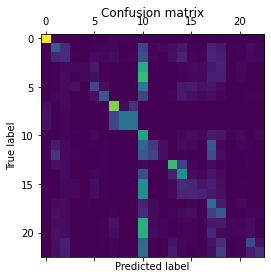

In [ ]:
#conf_mat = confusion_matrix(y, y_cross)

plt.matshow(cd)
#plt.figure(figsize=(20,20))
plt.title('Confusion matrix')
#plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("Confusion_matrix.png")
plt.show()


Confusion matrix, without normalization
[[3901   17    7    0    0    0    0   46   48   36    0    0    0    2
     0    0    0    0    0    0    0    0    0]
 [  16 1654  433   25   29   50   45    4    5    1   71  122  125  123
   214   48   48   86   92  301  282   95  115]
 [  12  531  808   60   74  175  116   46   60   39  143  144  141  169
   394   91   95   74  153  234  212  150  145]
 [   0   13   17 2362  560  237   27    0    1    0  256   21    9   21
    49   99  113   22   18  106   74   33   10]
 [   0   23   28  682 2297  142   36    0    3    1  248   50   10    9
    54   87   67   39   14  107  106   21   10]
 [   0   13   54  174   86 2382  157    0    3    7  114   21    5   42
   130  316  357   15   21   37   21   19    9]
 [   0   11   25   22   19  151 2179    1    0    0   64   19    1   51
    74  139   92   13   24   23   28   46   30]
 [  56    8   11    0    0    0    0 3373  481   39    0    0    0    0
     0    0    0    0    0    2    0    0    0]


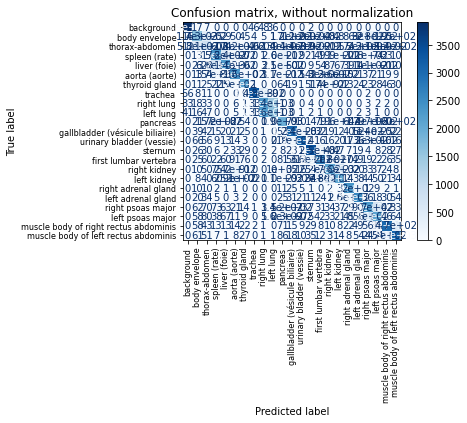

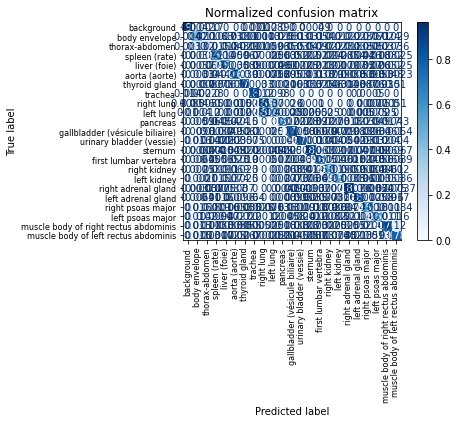

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

names = []
for k in OrgansNames:
    names.append(OrgansNames[k])
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.xticks(rotation = 'vertical')
    plt.tick_params(axis = 'both', labelsize = 8)
    plt.autoscale(enable=True, axis='both', tight=None)

    print(title)
    print(disp.confusion_matrix)

plt.show()